In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
#pip install wordcloud paste this in anaconda prompt
from wordcloud import WordCloud
from matplotlib import pyplot

In [41]:
Stock_News = pd.read_csv("C:/Users/Shubham Arrora/Desktop/Sentimental Analysis/stocknews/Combined_News_DJIA.csv")
Stock_News=pd.DataFrame(Stock_News)
Stock_News.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [38]:
#There is a character b in start of every news headlines, need to replace it with blank
for index in range(2,27):
    Stock_News.iloc[:,index] = Stock_News.iloc[:,index].str[1:]

In [46]:
Stock_News.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as coun...",'BREAKING: Musharraf to be impeached.','Russia Today: Columns of troops roll into Sou...,'Russian tanks are moving towards the capital ...,"""Afghan children raped with 'impunity,' U.N. o...",'150 Russian tanks have entered South Ossetia ...,"""Breaking: Georgia invades South Ossetia, Russ...","""The 'enemy combatent' trials are nothing but ...",...,'Georgia Invades South Ossetia - if Russia get...,'Al-Qaeda Faces Islamist Backlash',"'Condoleezza Rice: ""The US would not act to pr...",'This is a busy day: The European Union has a...,"""Georgia will withdraw 1,000 soldiers from Ira...",'Why the Pentagon Thinks Attacking Iran is a B...,'Caucasus in crisis: Georgia invades South Oss...,'Indian shoe manufactory - And again in a ser...,'Visitors Suffering from Mental Illnesses Bann...,"""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...,'Bush puts foot down on Georgian conflict',"""Jewish Georgian minister: Thanks to Israeli t...",'Georgian army flees in disarray as Russians a...,"""Olympic opening ceremony fireworks 'faked'""",'What were the Mossad with fraudulent New Zeal...,'Russia angered by Israeli military sale to Ge...,'An American citizen living in S.Ossetia blame...,...,'Israel and the US behind the Georgian aggress...,"'""Do not believe TV, neither Russian nor Georg...",'Riots are still going on in Montreal (Canada)...,'China to overtake US as largest manufacturer','War in South Ossetia [PICS]','Israeli Physicians Group Condemns State Torture',' Russia has just beaten the United States ove...,'Perhaps *the* question about the Georgia - Ru...,'Russia is so much better at war',"""So this is what it's come to: trading sex for..."
2,2008-08-12,0,'Remember that adorable 9-year-old who sang at...,"""Russia 'ends Georgia operation'""","'""If we had no sexual harassment we would have...","""Al-Qa'eda is losing support in Iraq because o...",'Ceasefire in Georgia: Putin Outmaneuvers the ...,'Why Microsoft and Intel tried to kill the XO ...,'Stratfor: The Russo-Georgian War and the Bala...,"""I'm Trying to Get a Sense of This Whole Georg...",...,'U.S. troops still in Georgia (did you know th...,'Why Russias response to Georgia was right',"'Gorbachev accuses U.S. of making a ""serious b...","'Russia, Georgia, and NATO: Cold War Two'",'Remember that adorable 62-year-old who led yo...,'War in Georgia: The Israeli connection','All signs point to the US encouraging Georgia...,'Christopher King argues that the US and NATO ...,'America: The New Mexico?',"""BBC NEWS | Asia-Pacific | Extinction 'by man ..."
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran: ...,"""When the president ordered to attack Tskhinva...",' Israel clears troops who killed Reuters came...,'Britain\'s policy of being tough on drugs is ...,'Body of 14 year old found in trunk; Latest (r...,'China has moved 10 *million* quake survivors ...,"""Bush announces Operation Get All Up In Russia...",'Russian forces sink Georgian ships ',...,'Elephants extinct by 2020?','US humanitarian missions soon in Georgia - if...,"""Georgia's DDOS came from US sources""","'Russian convoy heads into Georgia, violating ...",'Israeli defence minister: US against strike o...,'Gorbachev: We Had No Choice','Witness: Russian forces head towards Tbilisi ...,' Quarter of Russians blame U.S. for conflict:...,'Georgian president says US military will tak...,'2006: Nobel laureate Aleksander Solzhenitsyn ...
4,2008-08-14,1,'All the experts admit that we should legalise...,'War in South Osetia - 89 pictures made by a R...,'Swedish wrestler Ara Abrahamian throws away m...,'Russia exaggerated the death toll in South Os...,'Missile That Killed 9 Inside Pakistan May Hav...,"""Rushdie Condemns Random House's Refusal to Pu...",'Poland and US agree to missle defense 

In [45]:
type(Stock_News)

pandas.core.frame.DataFrame

In [5]:
Stock_News.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as coun...",'BREAKING: Musharraf to be impeached.','Russia Today: Columns of troops roll into Sou...,'Russian tanks are moving towards the capital ...,"""Afghan children raped with 'impunity,' U.N. o...",'150 Russian tanks have entered South Ossetia ...,"""Breaking: Georgia invades South Ossetia, Russ...","""The 'enemy combatent' trials are nothing but ...",...,'Georgia Invades South Ossetia - if Russia get...,'Al-Qaeda Faces Islamist Backlash',"'Condoleezza Rice: ""The US would not act to pr...",'This is a busy day: The European Union has a...,"""Georgia will withdraw 1,000 soldiers from Ira...",'Why the Pentagon Thinks Attacking Iran is a B...,'Caucasus in crisis: Georgia invades South Oss...,'Indian shoe manufactory - And again in a ser...,'Visitors Suffering from Mental Illnesses Bann...,"""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...,'Bush puts foot down on Georgian conflict',"""Jewish Georgian minister: Thanks to Israeli t...",'Georgian army flees in disarray as Russians a...,"""Olympic opening ceremony fireworks 'faked'""",'What were the Mossad with fraudulent New Zeal...,'Russia angered by Israeli military sale to Ge...,'An American citizen living in S.Ossetia blame...,...,'Israel and the US behind the Georgian aggress...,"'""Do not believe TV, neither Russian nor Georg...",'Riots are still going on in Montreal (Canada)...,'China to overtake US as largest manufacturer','War in South Ossetia [PICS]','Israeli Physicians Group Condemns State Torture',' Russia has just beaten the United States ove...,'Perhaps *the* question about the Georgia - Ru...,'Russia is so much better at war',"""So this is what it's come to: trading sex for..."
2,2008-08-12,0,'Remember that adorable 9-year-old who sang at...,"""Russia 'ends Georgia operation'""","'""If we had no sexual harassment we would have...","""Al-Qa'eda is losing support in Iraq because o...",'Ceasefire in Georgia: Putin Outmaneuvers the ...,'Why Microsoft and Intel tried to kill the XO ...,'Stratfor: The Russo-Georgian War and the Bala...,"""I'm Trying to Get a Sense of This Whole Georg...",...,'U.S. troops still in Georgia (did you know th...,'Why Russias response to Georgia was right',"'Gorbachev accuses U.S. of making a ""serious b...","'Russia, Georgia, and NATO: Cold War Two'",'Remember that adorable 62-year-old who led yo...,'War in Georgia: The Israeli connection','All signs point to the US encouraging Georgia...,'Christopher King argues that the US and NATO ...,'America: The New Mexico?',"""BBC NEWS | Asia-Pacific | Extinction 'by man ..."
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran: ...,"""When the president ordered to attack Tskhinva...",' Israel clears troops who killed Reuters came...,'Britain\'s policy of being tough on drugs is ...,'Body of 14 year old found in trunk; Latest (r...,'China has moved 10 *million* quake survivors ...,"""Bush announces Operation Get All Up In Russia...",'Russian forces sink Georgian ships ',...,'Elephants extinct by 2020?','US humanitarian missions soon in Georgia - if...,"""Georgia's DDOS came from US sources""","'Russian convoy heads into Georgia, violating ...",'Israeli defence minister: US against strike o...,'Gorbachev: We Had No Choice','Witness: Russian forces head towards Tbilisi ...,' Quarter of Russians blame U.S. for conflict:...,'Georgian president says US military will tak...,'2006: Nobel laureate Aleksander Solzhenitsyn ...
4,2008-08-14,1,'All the experts admit that we should legalise...,'War in South Osetia - 89 pictures made by a R...,'Swedish wrestler Ara Abrahamian throws away m...,'Russia exaggerated the death toll in South Os...,'Missile That Killed 9 Inside Pakistan May Hav...,"""Rushdie Condemns Random House's Refusal to Pu...",'Poland and US agree to missle defense 

In [48]:
train = Stock_News[Stock_News['Date'] < '20150101']
test = Stock_News[Stock_News['Date'] > '20141231']

In [49]:
# Removing punctuations for the news headlines and removing other characters

data = train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

# Renaming the columns
list1 = [i for i in range(25)]
new_index = [str(i) for i in list1]
data.columns=new_index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Georgia downs two Russian warplanes as coun...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into Sou...,Russian tanks are moving towards the capital ...,Afghan children raped with impunity U N o...,Russian tanks have entered South Ossetia ...,Breaking Georgia invades South Ossetia Russ...,The enemy combatent trials are nothing but ...,Georgian troops retreat from S Osettain capi...,Did the U S Prep Georgia for War with Russia,...,Georgia Invades South Ossetia if Russia get...,Al Qaeda Faces Islamist Backlash,Condoleezza Rice The US would not act to pr...,This is a busy day The European Union has a...,Georgia will withdraw soldiers from Ira...,Why the Pentagon Thinks Attacking Iran is a B...,Caucasus in crisis Georgia invades South Oss...,Indian shoe manufactory And again in a ser...,Visitors Suffering from Mental Illnesses Bann...,No Help for Mexico s Kidnapping Surge
1,Why wont America and Nato help us If they wo...,Bush puts foot down on Georgian conflict,Jewish Georgian minister Thanks to Israeli t...,Georgian army flees in disarray as Russians a...,Olympic opening ceremony fireworks faked,What were the Mossad with fraudulent New Zeal...,Russia angered by Israeli military sale to Ge...,An American citizen living in S Ossetia blame...,Welcome To World War IV Now In High Definiti...,Georgia s move a mistake of monumental propo...,...,Israel and the US behind the Georgian aggress...,Do not believe TV neither Russian nor Georg...,Riots are still going on in Montreal Canada ...,China to overtake US as largest manufacturer,War in South Ossetia PICS,Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States ove...,Perhaps the question about the Georgia Ru...,Russia is so much better at war,So this is what it s come to trading sex for...
2,Remember that adorable year old who sang at...,Russia ends Georgia operation,If we had no sexual harassment we would have...,Al Qa eda is losing support in Iraq because o...,Ceasefire in Georgia Putin Outmaneuvers the ...,Why Microsoft and Intel tried to kill the XO ...,Stratfor The Russo Georgian War and the Bala...,I m Trying to Get a Sense of This Whole Georg...,The US military was surprised by the timing a...,U S Beats War Drum as Iran Dumps the Dollar,...,U S troops still in Georgia did you know th...,Why Russias response to Georgia was right,Gorbachev accuses U S of making a serious b...,Russia Georgia and NATO Cold War Two,Remember that adorable year old who led yo...,War in Georgia The Israeli connection,All signs point to the US encouraging Georgia...,Christopher King argues that the US and NATO ...,America The New Mexico,BBC NEWS Asia Pacific Extinction by man ...
3,U S refuses Israel weapons to attack Iran ...,When the president ordered to attack Tskhinva...,Israel clears troops who killed Reuters came...,Britain s policy of being tough on drugs is ...,Body of year old found in trunk Latest r...,China has moved million quake survivors ...,Bush announces Operation Get All Up In Russia...,Russian forces sink Georgian ships,The commander of a Navy air reconnaissance sq...,of CNN readers Russia s actions in Georg...,...,Elephants extinct by,US humanitarian missions soon in Georgia if...,Georgia s DDOS came from US sources,Russian convoy heads into Georgia violating ...,Israeli defence minister US against strike o...,Gorbachev We Had No Choice,Witness Russian forces head towards Tbilisi ...,Quarter of Russians blame U S for conflict ...,Georgian president says US military will tak...,Nobel laureate Aleksander Solzhenitsyn ...
4,All the experts admit that we should legalise...,War in South Osetia pictures made by a R...,Swedish wrestler Ara Abrahamian throws away m...,Russia exaggerated the death toll in South Os...,Missile That Killed Inside Pakistan May Hav...,Rushdie Condemns Random House s Refusal to Pu...,Poland and US agree to missle defense deal I...,Will the Russians conqu

In [50]:
# converting all in lower case
for index in new_index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,georgia downs two russian warplanes as coun...,breaking musharraf to be impeached,russia today columns of troops roll into sou...,russian tanks are moving towards the capital ...,afghan children raped with impunity u n o...,russian tanks have entered south ossetia ...,breaking georgia invades south ossetia russ...,the enemy combatent trials are nothing but ...,georgian troops retreat from s osettain capi...,did the u s prep georgia for war with russia,...,georgia invades south ossetia if russia get...,al qaeda faces islamist backlash,condoleezza rice the us would not act to pr...,this is a busy day the european union has a...,georgia will withdraw soldiers from ira...,why the pentagon thinks attacking iran is a b...,caucasus in crisis georgia invades south oss...,indian shoe manufactory and again in a ser...,visitors suffering from mental illnesses bann...,no help for mexico s kidnapping surge


In [51]:
# Concatenating all the news for a particular day
''.join(str(x) for x in data.iloc[1,0:25])

' why wont america and nato help us  if they wont help us now  why did we help them in iraq   bush puts foot down on georgian conflict  jewish georgian minister  thanks to israeli training  we re fending off russia   georgian army flees in disarray as russians advance   gori abandoned to russia without a shot fired  olympic opening ceremony fireworks  faked   what were the mossad with fraudulent new zealand passports doing in iraq   russia angered by israeli military sale to georgia  an american citizen living in s ossetia blames u s  and georgian leaders for the genocide of innocent people  welcome to world war iv  now in high definition   georgia s move  a mistake of monumental proportions   russia presses deeper into georgia  u s  says regime change is goal  abhinav bindra wins first ever individual olympic gold medal for india   u s  ship heads for arctic to define territory  drivers in a jerusalem taxi station threaten to quit rather than work for their new boss   an arab  the fre

In [52]:
headlines=[]
for row in range(0,len(data.index)):
    headlines.append(''.join(str(x) for x in data.iloc[row,0:25]))
    
headlines[0]

' georgia  downs two russian warplanes  as countries move to brink of war  breaking  musharraf to be impeached   russia today  columns of troops roll into south ossetia  footage from fighting  youtube   russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing      russian tanks have entered south ossetia whilst georgia shoots down two russian jets   breaking  georgia invades south ossetia  russia warned it would intervene on so s side  the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   did the u s  prep georgia for war with russia   rice gives green light for israel to 

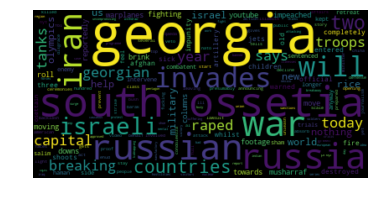

In [53]:
#Preparing the Word Cloud
wordcloud = WordCloud(max_words=200).generate(headlines[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [55]:
# implement bang of words
countvector = CountVectorizer(ngram_range=(2,2))
traindataset= countvector.fit_transform(headlines)

In [56]:
# implement Random Forest CLassifier
randomclassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
# Predict for the Test Dataset
test_transform = []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [71]:
# Import library to check data accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score ,roc_curve

In [59]:
matrix = confusion_matrix(test['Label'],predictions)
print(matrix)
score = accuracy_score(test['Label'],predictions)
print(score)
report = classification_report(test['Label'],predictions)
print(report)

[[132  54]
 [  1 191]]
0.8544973544973545
             precision    recall  f1-score   support

          0       0.99      0.71      0.83       186
          1       0.78      0.99      0.87       192

avg / total       0.88      0.85      0.85       378



In [72]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test['Label'], predictions)

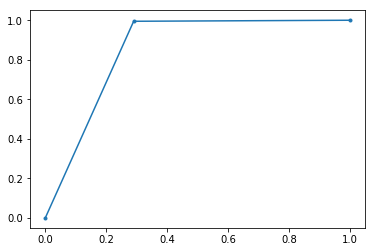

In [79]:
pyplot.plot(fpr, tpr, marker='.', label='RandomForest')

In [74]:
# calculate AUC
auc = roc_auc_score(test['Label'], predictions)
print('AUC: %.3f' % auc)

AUC: 0.852
